In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

In [57]:
df = pd.read_csv('plot_data/FF_d7_BrainWT_area_21Dec23.csv')
#drop unnamed column
df = df.drop(df.columns[0], axis=1)
#remove Cluster_Label column and Group Column
df.drop(['Cluster_Label', 'Group'], axis=1, inplace=True)
df

,Lipid,Sample_ID,db,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Transition,Area,Area_RT,Area_Ratio,FAC,TG
0,[TG(52:5)]_FA16:1,11282023_DOD94_F3_WT_cereb_O3on_01,n-7,788.7,599.5,12.02,673.0,788.7 -> 599.5,2693.0,0.000000,NaN,FA16:1,TG(52:5)
1,[TG(52:5)]_FA16:1,11282023_DOD94_F3_WT_cortex_O3on_01,n-7,788.7,599.5,12.02,1126.0,788.7 -> 599.5,6754.0,0.044150,NaN,FA16:1,TG(52:5)
2,[TG(52:5)]_FA16:1,11282023_DOD94_F3_WT_dienc_O3on_01,n-7,788.7,599.5,12.10,1567.0,788.7 -> 599.5,16093.0,0.044667,NaN,FA16:1,TG(52:5)
3,[TG(52:5)]_FA16:1,11282023_FAD184_F3_WT_cortex_O3on_01,n-7,788.7,599.5,12.02,3221.0,788.7 -> 599.5,41227.0,0.089067,NaN,FA16:1,TG(52:5)
4,[TG(52:5)]_FA16:1,11282023_FAD184_F3_WT_dienc_O3on_01,n-7,788.7,599.5,12.06,512.0,788.7 -> 599.5,2048.0,0.000000,NaN,FA16:1,TG(52:5)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,"[TG(57:11),TG(56:4)]_FA18:1",11282023_FAD185_M4_WT_cereb_O3on_01,n-9,818.7,629.5,15.56,5517.0,818.7 -> 629.5,109496.0,0.177617,20.34,FA18:1,"TG(56:4), TG(57:11)"
170,"[TG(57:11),TG(56:4)]_FA18:1",11282023_FAD189_M3_WT_cereb_O3on_01,n-9,818.7,629.5,15.56,584.0,818.7 -> 629.5,2335.0,0.000000,NaN,FA18:1,"TG(56:4), TG(57:11)"
171,"[TG(57:11),TG(56:4)]_FA18:1",11282023_FAD189_M3_WT_cortex_O3on_01,n-9,818.7,629.5,15.56,1377.0,818.7 -> 629.5,16147.0,0.088817,NaN,FA18:1,"TG(56:4), TG(57:11)"
172,"[TG(57:11),TG(56:4)]_FA18:1",11282023_FAD189_M3_WT_dienc_O3on_01,n-9,818.7,629.5,15.56,550.0,818.7 -> 629.5,2201.0,0.000000,NaN,FA18:1,"TG(56:4), TG(57:11)"


Add Liver Brain label

In [58]:

# Define function to extract biology term
def extract_biology(sample_id):
    for term in ["liver", "cortex", "cereb", "hippo", "dienc"]:
        if term in sample_id.lower():
            return term
    return None

# Apply function to create new column
df['Biology'] = df['Sample_ID'].apply(extract_biology)
df['Genotype'] = df['Sample_ID'].apply(lambda x: '5xFAD' if 'WT' not in x else 'WT')

# df.to_csv('df_for_gpt.csv')

# Extracting the mouse name from the 'Sample_ID' column
df['Mouse'] = df['Sample_ID'].apply(lambda x: '_'.join(x.split('_')[1:3]))
df

,Lipid,Sample_ID,db,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Transition,Area,Area_RT,Area_Ratio,FAC,TG,Biology,Genotype,Mouse
0,[TG(52:5)]_FA16:1,11282023_DOD94_F3_WT_cereb_O3on_01,n-7,788.7,599.5,12.02,673.0,788.7 -> 599.5,2693.0,0.000000,NaN,FA16:1,TG(52:5),cereb,WT,DOD94_F3
1,[TG(52:5)]_FA16:1,11282023_DOD94_F3_WT_cortex_O3on_01,n-7,788.7,599.5,12.02,1126.0,788.7 -> 599.5,6754.0,0.044150,NaN,FA16:1,TG(52:5),cortex,WT,DOD94_F3
2,[TG(52:5)]_FA16:1,11282023_DOD94_F3_WT_dienc_O3on_01,n-7,788.7,599.5,12.10,1567.0,788.7 -> 599.5,16093.0,0.044667,NaN,FA16:1,TG(52:5),dienc,WT,DOD94_F3
3,[TG(52:5)]_FA16:1,11282023_FAD184_F3_WT_cortex_O3on_01,n-7,788.7,599.5,12.02,3221.0,788.7 -> 599.5,41227.0,0.089067,NaN,FA16:1,TG(52:5),cortex,WT,FAD184_F3
4,[TG(52:5)]_FA16:1,11282023_FAD184_F3_WT_dienc_O3on_01,n-7,788.7,599.5,12.06,512.0,788.7 -> 599.5,2048.0,0.000000,NaN,FA16:1,TG(52:5),dienc,WT,FAD184_F3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,"[TG(57:11),TG(56:4)]_FA18:1",11282023_FAD185_M4_WT_cereb_O3on_01,n-9,818.7,629.5,15.56,5517.0,818.7 -> 629.5,109496.0,0.177617,20.34,FA18:1,"TG(56:4), TG(57:11)",cereb,WT,FAD185_M4
170,"[TG(57:11),TG(56:4)]_FA18:1",11282023_FAD189_M3_WT_cereb_O3on_01,n-9,818.7,629.5,15.56,584.0,818.7 -> 629.5,2335.0,0.000000,NaN,FA18:1,"TG(56:4), TG(57:11)",cereb,WT,FAD189_M3
171,"[TG(57:11),TG(56:4)]_FA18:1",11282023_FAD189_M3_WT_cortex_O3on_01,n-9,818.7,629.5,15.56,1377.0,818.7 -> 629.5,16147.0,0.088817,NaN,FA18:1,"TG(56:4), TG(57:11)",cortex,WT,FAD189_M3
172,"[TG(57:11),TG(56:4)]_FA18:1",11282023_FAD189_M3_WT_dienc_O3on_01,n-9,818.7,629.5,15.56,550.0,818.7 -> 629.5,2201.0,0.000000,NaN,FA18:1,"TG(56:4), TG(57:11)",dienc,WT,FAD189_M3


In [59]:
df['SLBG_group'] = df.groupby(['Lipid', 'Sample_ID','Biology','Genotype']).ngroup()
# df['Lipid_Biology_group'] = df.groupby(['Lipid', 'Biology']).ngroup()
# Filter for 'liver' in Biology
# liver_df = df[df['Biology'] == 'liver']
# # Filter the DataFrame for each of the brain biology values and concatenate them into one DataFrame
# brain_df = pd.concat([
#     df[df['Biology'] == 'cortex'],
#     df[df['Biology'] == 'cereb'],
#     df[df['Biology'] == 'hippo'],
#     df[df['Biology'] == 'dienc']
# ])
# brain_df

# # Group by Lipid and db_pos
# liver_df['SLBG_group'] = liver_df.groupby(['Lipid', 'Sample_ID','Biology','Genotype']).ngroup()
# brain_df['SLBG_group'] = brain_df.groupby(['Lipid', 'Sample_ID','Biology','Genotype']).ngroup()



# Assuming df is your DataFrame

# Step 1: Extract the last part of the Lipid name
df['Lipid_End'] = df['Lipid'].str.extract(r'(FA\d+:\d+)$')

# Step 2: Sort the DataFrame
# We'll sort by the new 'Lipid_End' column, and then by the original 'Lipid' column to maintain order within each group
df = df.sort_values(by=['Lipid_End', 'Lipid'], ascending=[True, True])

# If you specifically want 'FA16:1' to appear before 'FA18:1'
# You might need a custom sorting function or a categorical type for the 'Lipid_End' column
df['Lipid_End'] = pd.Categorical(df['Lipid_End'], categories=['FA16:1', 'FA18:1'], ordered=True)
df = df.sort_values(by=['Lipid_End', 'Lipid'])

df.to_csv('df_OzESI_labels.csv')

df

,Lipid,Sample_ID,db,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Transition,Area,Area_RT,Area_Ratio,FAC,TG,Biology,Genotype,Mouse,SLBG_group,Lipid_End
0,[TG(52:5)]_FA16:1,11282023_DOD94_F3_WT_cereb_O3on_01,n-7,788.7,599.5,12.02,673.0,788.7 -> 599.5,2693.0,0.000000,NaN,FA16:1,TG(52:5),cereb,WT,DOD94_F3,13,FA16:1
1,[TG(52:5)]_FA16:1,11282023_DOD94_F3_WT_cortex_O3on_01,n-7,788.7,599.5,12.02,1126.0,788.7 -> 599.5,6754.0,0.044150,NaN,FA16:1,TG(52:5),cortex,WT,DOD94_F3,14,FA16:1
2,[TG(52:5)]_FA16:1,11282023_DOD94_F3_WT_dienc_O3on_01,n-7,788.7,599.5,12.10,1567.0,788.7 -> 599.5,16093.0,0.044667,NaN,FA16:1,TG(52:5),dienc,WT,DOD94_F3,15,FA16:1
3,[TG(52:5)]_FA16:1,11282023_FAD184_F3_WT_cortex_O3on_01,n-7,788.7,599.5,12.02,3221.0,788.7 -> 599.5,41227.0,0.089067,NaN,FA16:1,TG(52:5),cortex,WT,FAD184_F3,16,FA16:1
4,[TG(52:5)]_FA16:1,11282023_FAD184_F3_WT_dienc_O3on_01,n-7,788.7,599.5,12.06,512.0,788.7 -> 599.5,2048.0,0.000000,NaN,FA16:1,TG(52:5),dienc,WT,FAD184_F3,17,FA16:1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,"[TG(57:9),TG(56:2)]_FA18:1",11282023_FAD184_F3_WT_cortex_O3on_01,n-9,822.8,633.6,17.91,511.0,822.8 -> 633.6,2044.0,0.000000,NaN,FA18:1,"TG(56:2), TG(57:9)",cortex,WT,FAD184_F3,125,FA18:1
155,"[TG(57:9),TG(56:2)]_FA18:1",11282023_FAD184_F3_WT_hippo_O3on_01,n-9,822.8,633.6,17.91,620.0,822.8 -> 633.6,4717.0,0.044417,NaN,FA18:1,"TG(56:2), TG(57:9)",hippo,WT,FAD184_F3,126,FA18:1
156,"[TG(57:9),TG(56:2)]_FA18:1",11282023_FAD184_F4_WT_cereb_O3on_01,n-9,822.8,633.6,17.91,549.0,822.8 -> 633.6,2197.0,0.000000,NaN,FA18:1,"TG(56:2), TG(57:9)",cereb,WT,FAD184_F4,127,FA18:1
157,"[TG(57:9),TG(56:2)]_FA18:1",11282023_FAD185_M4_WT_cereb_O3on_01,n-9,822.8,633.6,17.91,2292.0,822.8 -> 633.6,26014.0,0.177650,NaN,FA18:1,"TG(56:2), TG(57:9)",cereb,WT,FAD185_M4,128,FA18:1


copy df to df2 to do db calcuations

In [60]:
# Copying df2 to create df3
df2 = df.copy()

# Displaying the first few rows of df3 with the new 'Total Intensity' column
df2.head(50)


,Lipid,Sample_ID,db,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Transition,Area,Area_RT,Area_Ratio,FAC,TG,Biology,Genotype,Mouse,SLBG_group,Lipid_End
0,[TG(52:5)]_FA16:1,11282023_DOD94_F3_WT_cereb_O3on_01,n-7,788.7,599.5,12.02,673.0,788.7 -> 599.5,2693.0,0.000000,NaN,FA16:1,TG(52:5),cereb,WT,DOD94_F3,13,FA16:1
1,[TG(52:5)]_FA16:1,11282023_DOD94_F3_WT_cortex_O3on_01,n-7,788.7,599.5,12.02,1126.0,788.7 -> 599.5,6754.0,0.044150,NaN,FA16:1,TG(52:5),cortex,WT,DOD94_F3,14,FA16:1
2,[TG(52:5)]_FA16:1,11282023_DOD94_F3_WT_dienc_O3on_01,n-7,788.7,599.5,12.10,1567.0,788.7 -> 599.5,16093.0,0.044667,NaN,FA16:1,TG(52:5),dienc,WT,DOD94_F3,15,FA16:1
3,[TG(52:5)]_FA16:1,11282023_FAD184_F3_WT_cortex_O3on_01,n-7,788.7,599.5,12.02,3221.0,788.7 -> 599.5,41227.0,0.089067,NaN,FA16:1,TG(52:5),cortex,WT,FAD184_F3,16,FA16:1
4,[TG(52:5)]_FA16:1,11282023_FAD184_F3_WT_dienc_O3on_01,n-7,788.7,599.5,12.06,512.0,788.7 -> 599.5,2048.0,0.000000,NaN,FA16:1,TG(52:5),dienc,WT,FAD184_F3,17,FA16:1
5,[TG(52:5)]_FA16:1,11282023_FAD185_M4_WT_cereb_O3on_01,n-7,788.7,599.5,12.02,26428.0,788.7 -> 599.5,541404.0,0.355533,0.04,FA16:1,TG(52:5),cereb,WT,FAD185_M4,18,FA16:1
6,[TG(52:5)]_FA16:1,11282023_FAD185_M4_WT_cereb_O3on_01,n-9,760.7,599.5,12.07,2939.0,760.7 -> 599.5,21302.0,0.044400,0.04,FA16:1,TG(52:5),cereb,WT,FAD185_M4,18,FA16:1
7,[TG(52:5)]_FA16:1,11282023_FAD185_M4_WT_cortex_O3on_01,n-7,788.7,599.5,12.02,16896.0,788.7 -> 599.5,302318.0,0.222300,0.07,FA16:1,TG(52:5),cortex,WT,FAD185_M4,19,FA16:1
8,[TG(52:5)]_FA16:1,11282023_FAD185_M4_WT_cortex_O3on_01,n-9,760.7,599.5,12.07,3054.0,760.7 -> 599.5,20725.0,0.088817,0.07,FA16:1,TG(52:5),cortex,WT,FAD185_M4,19,FA16:1
9,[TG(52:5)]_FA16:1,11282023_FAD185_M4_WT_dienc_O3on_01,n-7,788.7,599.5,12.02,1840.0,788.7 -> 599.5,21688.0,0.089067,NaN,FA16:1,TG(52:5),dienc,WT,FAD185_M4,20,FA16:1


Brain WT pipeline workflow

In [61]:
import pandas as pd

# Assuming df2 is your original DataFrame
# df2 = pd.read_csv('path_to_your_data.csv') # Uncomment and modify this line to load your data

# Filtering for WT Genotype
df_wt = df2[df2['Genotype'] == 'WT']

# Step 1: Filter for non-liver samples and rename to df_brain_wt
df_brain_wt = df_wt[df_wt['Biology'] != 'liver']

# Step 2: Create and fill n-7, n-9, n-10, n-12 columns in df_brain_wt
for col in ['n-7', 'n-9', 'n-10', 'n-12']:
    df_brain_wt[col] = df_brain_wt.apply(lambda x: x['Area'] if x['db'] == col else 0, axis=1)

# Step 3: Group by 'Lipid' and sum up the n columns in df_brain_wt2
df_brain_wt2 = df_brain_wt.groupby('Lipid')[['n-7', 'n-9', 'n-10', 'n-12']].sum().round(0).reset_index()

# Step 4: Calculate total intensity and relative intensities in df_brain_wt2
df_brain_wt2['Total_Intensity'] = df_brain_wt2[['n-7', 'n-9', 'n-10', 'n-12']].sum(axis=1)

for col in ['n-7', 'n-9', 'n-10', 'n-12']:
    df_brain_wt2[col + '%'] = ((df_brain_wt2[col] / df_brain_wt2['Total_Intensity']) * 100).round(1)

# Display the final DataFrame df_brain_wt2
df_brain_wt2


,Lipid,n-7,n-9,n-10,n-12,Total_Intensity,n-7%,n-9%,n-10%,n-12%
0,[TG(50:3)]_FA18:1,5678.0,362678.0,0.0,0,368356.0,1.5,98.5,0.0,0.0
1,[TG(52:5)]_FA16:1,1410303.0,61327.0,0.0,0,1471630.0,95.8,4.2,0.0,0.0
2,[TG(54:5)]_FA18:1,99474.0,1689897.0,0.0,0,1789371.0,5.6,94.4,0.0,0.0
3,[TG(54:6)]_FA18:1,0.0,49816.0,0.0,0,49816.0,0.0,100.0,0.0,0.0
4,"[TG(55:10),TG(54:3)]_FA18:1",374733.0,6573126.0,0.0,0,6947859.0,5.4,94.6,0.0,0.0
5,"[TG(55:11),TG(54:4)]_FA18:1",361658.0,3110209.0,0.0,0,3471867.0,10.4,89.6,0.0,0.0
6,"[TG(55:8),TG(54:1)]_FA18:1",0.0,77354.0,0.0,0,77354.0,0.0,100.0,0.0,0.0
7,"[TG(55:9),TG(54:2)]_FA18:1",77457.0,1445955.0,2436.0,0,1525848.0,5.1,94.8,0.2,0.0
8,"[TG(56:7),]_FA18:1",0.0,2628.0,0.0,0,2628.0,0.0,100.0,0.0,0.0
9,"[TG(57:10),TG(56:3)]_FA18:1",0.0,130023.0,0.0,0,130023.0,0.0,100.0,0.0,0.0


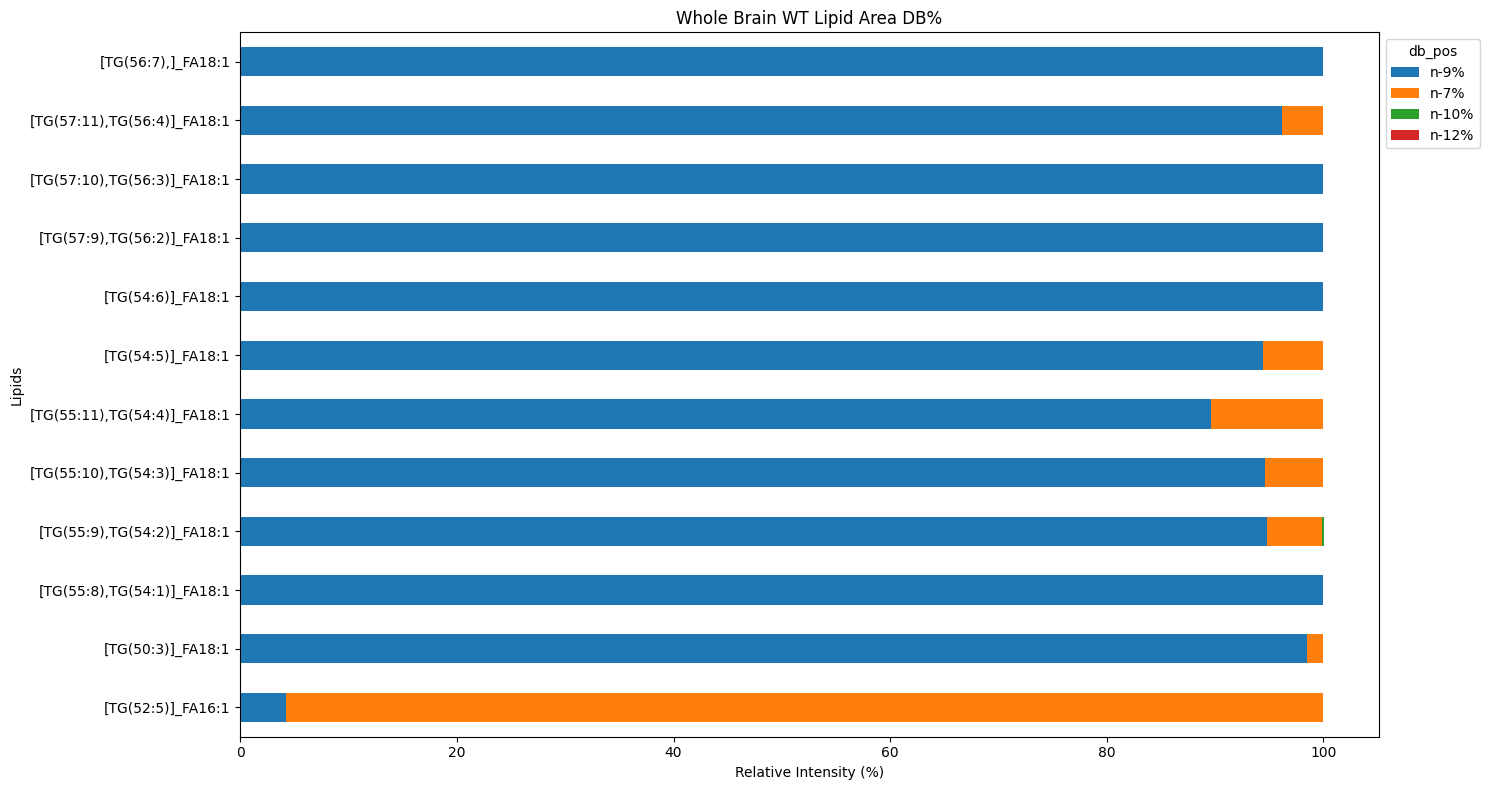

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Assuming df_brain_wt3 is your DataFrame
# df_brain_wt3 = pd.read_csv('path_to_your_data.csv') # Uncomment and modify this line to load your data
df_brain_wt3 = df_brain_wt2.copy()

# Function to generate a combined sorting key
def combined_sort_key(lipid):
    fa16_1_key = '0' if 'FA16:1' in lipid else '1'
    tg_list = re.findall(r'TG\(\d+:\d+\)', lipid)
    tg_list_sorted = ', '.join(sorted(tg_list, key=lambda x: [int(i) for i in x[3:-1].split(':')]))
    return fa16_1_key + tg_list_sorted + lipid

# Reshape the DataFrame and create pivot table for plotting
reshaped_df = df_brain_wt3.melt(id_vars='Lipid', value_vars=['n-7%', 'n-9%', 'n-10%', 'n-12%'], var_name='db_pos', value_name='Percentage')
pivot_df = reshaped_df.pivot_table(index='Lipid', columns='db_pos', values='Percentage', aggfunc='sum')[['n-9%', 'n-7%', 'n-10%', 'n-12%']]

# Apply the combined sorting function to the Lipid index to create a sorting key
pivot_df['Combined_Sort_Key'] = pivot_df.index.to_series().apply(combined_sort_key)

# Sort the DataFrame by the combined sorting key
pivot_df = pivot_df.sort_values(by='Combined_Sort_Key')

# Drop the combined sorting key column
pivot_df.drop('Combined_Sort_Key', axis=1, inplace=True)

# Plotting
pivot_df.plot(kind='barh', stacked=True, figsize=(15, 8))
plt.xlabel('Relative Intensity (%)')
plt.ylabel('Lipids')
plt.title('Whole Brain WT Lipid Area DB%')
plt.legend(title='db_pos', loc='upper left', bbox_to_anchor=(1, 1))

# Saving the plot as a PNG file
plt.savefig('Barstack_area/WholeBrain_WT_Area.png', dpi=300, bbox_inches='tight')
#save as pdf
plt.savefig('Barstack_area/WholeBrain_WT_Area.pdf', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()


BRAIN Regions WT

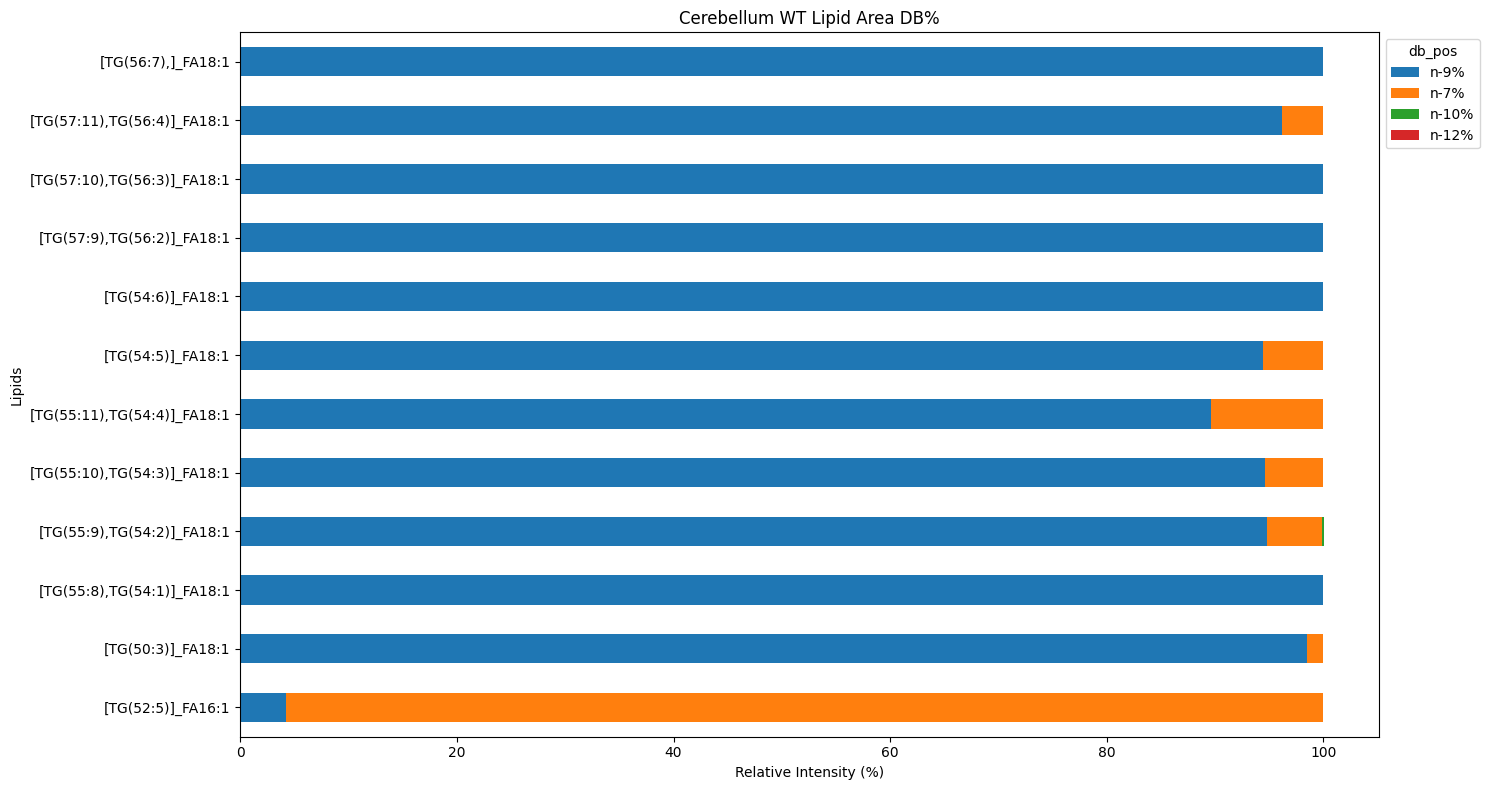

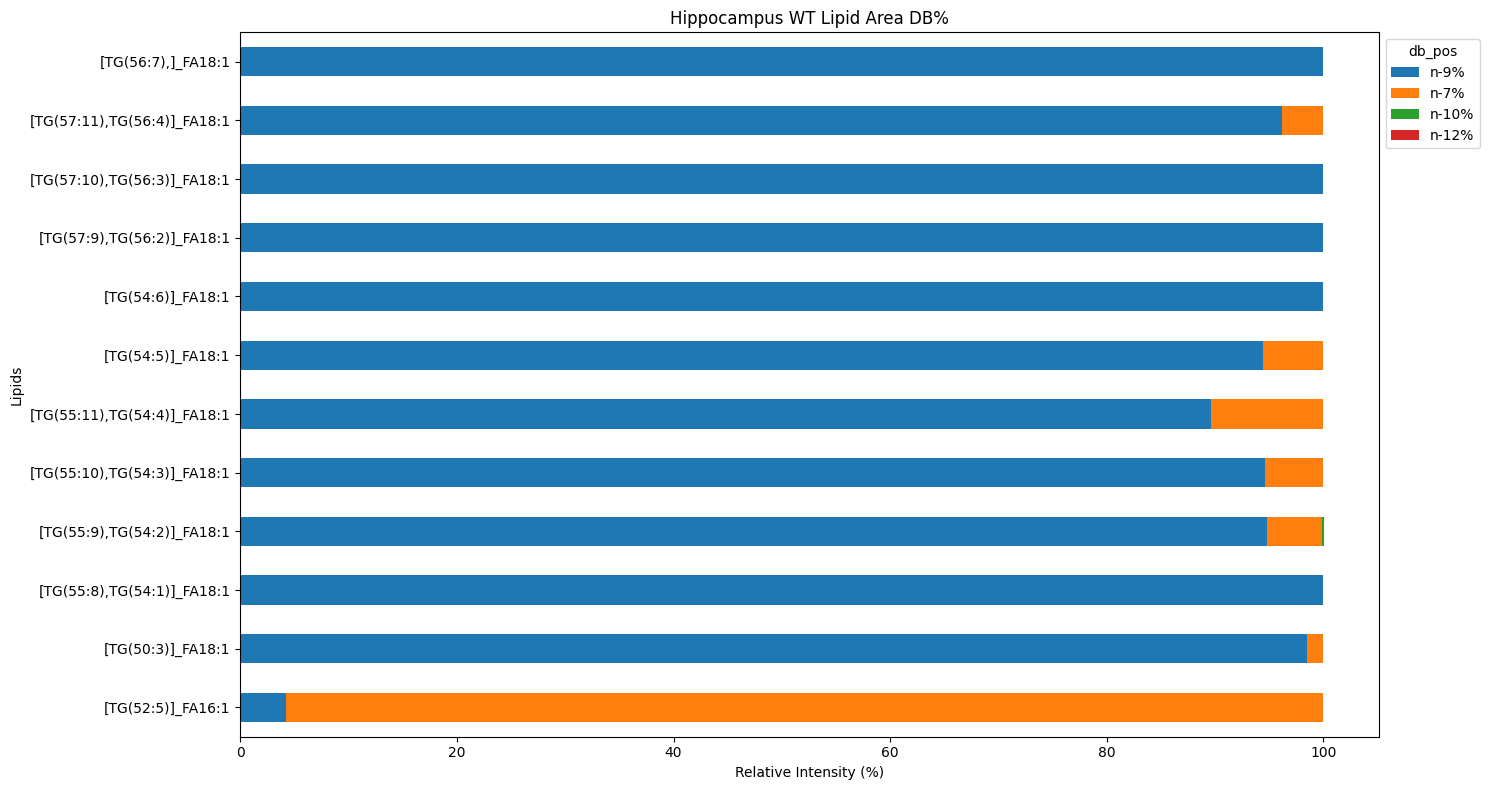

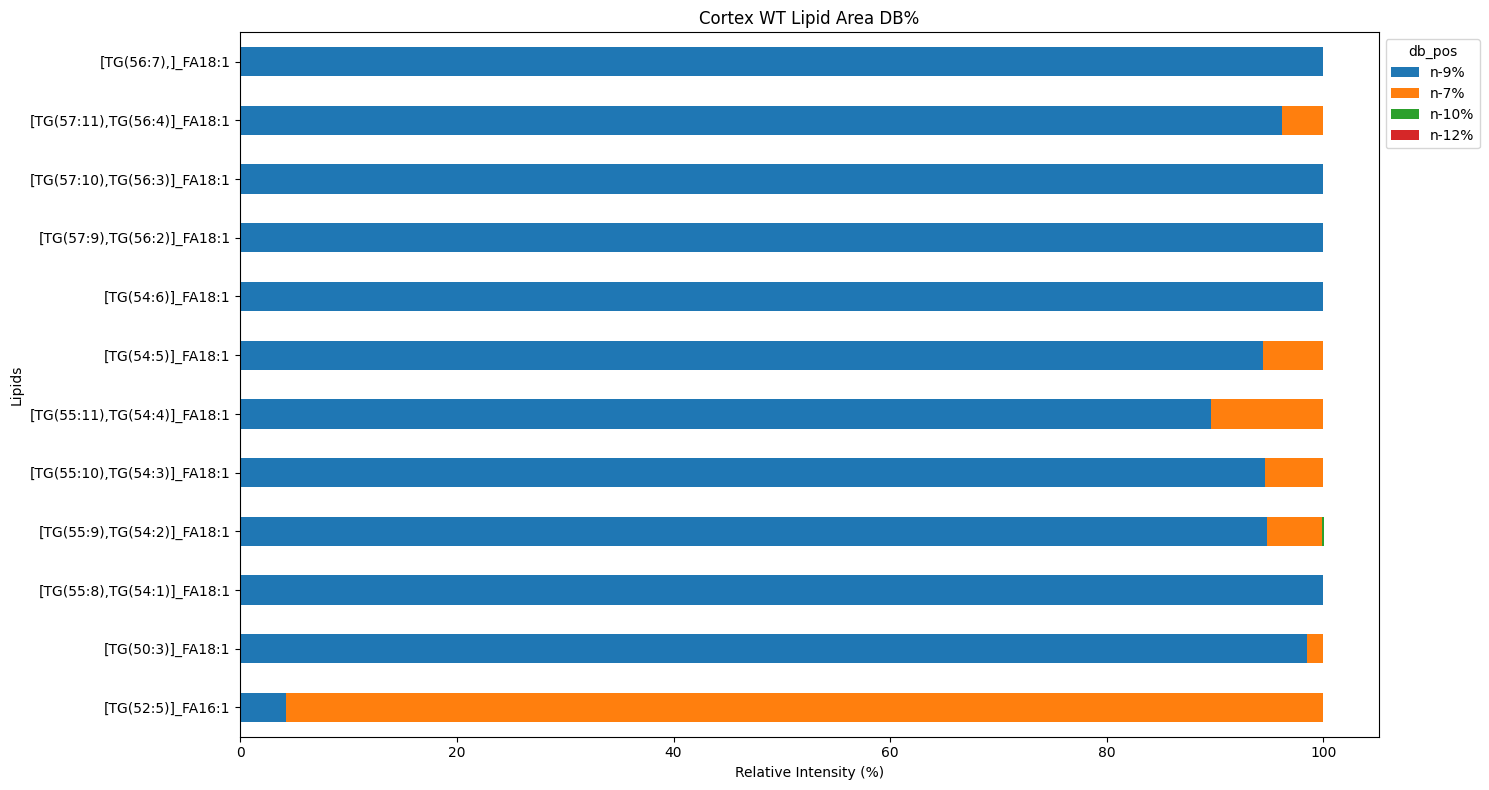

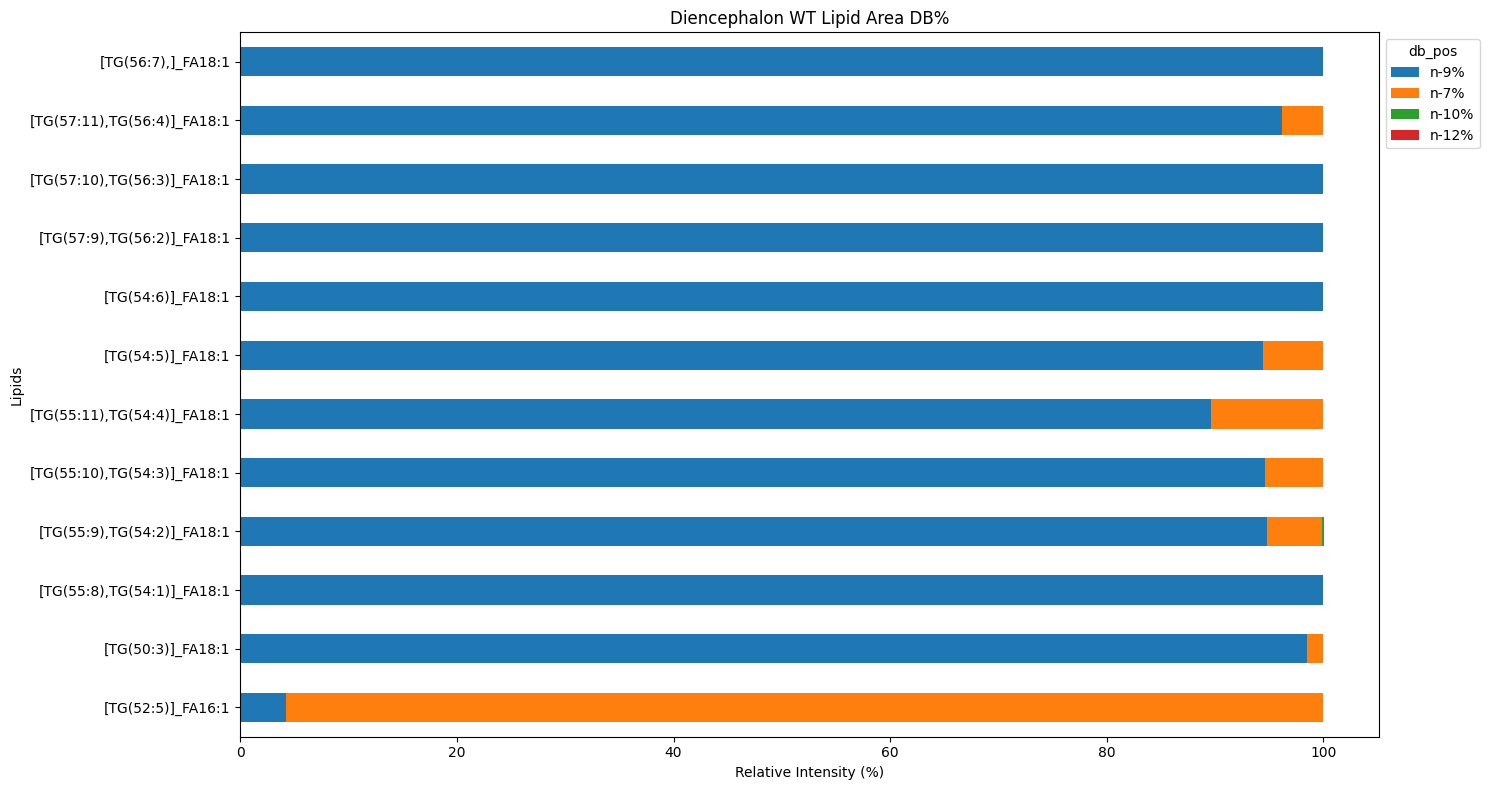

In [63]:
import matplotlib.pyplot as plt
import pandas as pd
import re

def combined_sort_key(lipid):
    fa16_1_key = '0' if 'FA16:1' in lipid else '1'
    tg_list = re.findall(r'TG\(\d+:\d+\)', lipid)
    tg_list_sorted = ', '.join(sorted(tg_list, key=lambda x: [int(i) for i in x[3:-1].split(':')]))
    return fa16_1_key + tg_list_sorted + lipid

def plot_brain_region_data(df, region_name):
    # # Calculate percentages
    # for col in ['n-7', 'n-9', 'n-10', 'n-12']:
    #     df[col + '%'] = ((df[col] / df['Total_Intensity']) * 100).round(1)

    # Reshape the DataFrame
    reshaped_df = df.melt(id_vars='Lipid', value_vars=['n-7%', 'n-9%', 'n-10%', 'n-12%'], var_name='db_pos', value_name='Percentage')

    # Create pivot table
    pivot_df = reshaped_df.pivot_table(index='Lipid', columns='db_pos', values='Percentage', aggfunc='sum')[['n-9%', 'n-7%', 'n-10%', 'n-12%']]

    # Apply the combined sorting function to the Lipid index to create a sorting key
    pivot_df['Combined_Sort_Key'] = pivot_df.index.to_series().apply(combined_sort_key)

    # Sort the DataFrame by the combined sorting key
    pivot_df = pivot_df.sort_values(by='Combined_Sort_Key')

    # Drop the combined sorting key column
    pivot_df.drop('Combined_Sort_Key', axis=1, inplace=True)

    # Plotting
    pivot_df.plot(kind='barh', stacked=True, figsize=(15, 8))
    plt.xlabel('Relative Intensity (%)')
    plt.ylabel('Lipids')
    plt.title(f'{region_name} WT Lipid Area DB%')
    plt.legend(title='db_pos', loc='upper left', bbox_to_anchor=(1, 1))

    # Saving the plot
    plt.savefig(f'Barstack_area/{region_name}_WT_Area.png', dpi=300, bbox_inches='tight')
    plt.savefig(f'Barstack_area/{region_name}_WT_Area.pdf', dpi=300, bbox_inches='tight')
    plt.tight_layout()
    plt.show()

# Example usage
plot_brain_region_data(df_brain_wt2, 'Cerebellum')
plot_brain_region_data(df_brain_wt2, 'Hippocampus')
plot_brain_region_data(df_brain_wt2, 'Cortex')
plot_brain_region_data(df_brain_wt2, 'Diencephalon')


Brain REGIONS 5xFAD

In [64]:
# import plotly.express as px
# import plotly.io as pio
# import plotly.graph_objects as go

# pio.templates.default = 'plotly'

# # Assuming pivot_df and reshaped_df_for_plotly are already defined

# # Advanced color palette
# color_palette = ['#0081a7', '#00afb9', '#fdfcdc', '#fed9b7', '#f07167']

# # Create the bar plot
# fig = px.bar(reshaped_df_for_plotly, 
#              x='Percentage', 
#              y='Lipid', 
#              color='Type', 
#              orientation='h', 
#              title='Enhanced Visualization of Lipid Distribution in Whole Brain WT',
#              color_discrete_sequence=color_palette,
#              text='Percentage')

# # Sophisticated layout adjustments
# fig.update_layout(
#     xaxis_title='Relative Intensity (%)',
#     yaxis_title='Lipid Types',
#     legend_title='Lipid Categories',
#     barmode='stack',
#     font=dict(family="Arial, sans-serif", size=14),
#     legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
#     margin=dict(l=20, r=20, t=40, b=20),
#     paper_bgcolor='rgba(255, 255, 255, 1)',
#     plot_bgcolor='rgba(255, 255, 255, 1)'
# )

# # Customizing axes and gridlines
# fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgray', linecolor='lightgray')
# fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgray', linecolor='lightgray')

# # Enhance interactivity
# fig.update_traces(hoverinfo='all', hovertemplate='%{y}: %{x}%')

# # Highlighting key data with annotations (example)
# fig.add_annotation(x=max(reshaped_df_for_plotly['Percentage']), y='SomeSpecificLipid', 
#                    text="Highest percentage", 
#                    showarrow=True, arrowhead=1)

# # Additional graphical elements for emphasis
# fig.add_vline(x=50, line_width=2, line_dash="dash", line_color="red")

# # Display the figure
# fig.show()


In [65]:
# import plotly.express as px
# import plotly.io as pio

# pio.templates.default = 'plotly'

# # Assuming pivot_df and reshaped_df_for_plotly are already defined as in your previous code

# # Professional and accessible color palette
# color_palette = ['#4C78A8', '#F58518', '#E45756']

# # Create a bar plot using Plotly Express
# fig = px.bar(reshaped_df_for_plotly, 
#              x='Percentage', 
#              y='Lipid', 
#              color='Type', 
#              orientation='h', 
#              title='Distribution of Lipids in Whole Brain WT (DB%)',
#              color_discrete_sequence=color_palette,
#    )

# # Customizing the layout for clarity and readability
# fig.update_layout(
#     xaxis_title='Relative Intensity (%)',
#     yaxis_title='Lipid Types',
#     legend_title='Lipid Categories',
#     barmode='stack',
#     font=dict(family="Arial, sans-serif", size=12, color="black"),
#     legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
#     margin=dict(l=10, r=10, t=30, b=10)
# )

# # Customizing the axes for better visibility
# fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')
# fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')
# # #save as pdf
# # fig.write_image("Barplot_OzON/Brain_Whole_WT3.pdf")
# # Display the figure
# fig.show()

In [66]:
import plotly.express as px
# import plotly.io as pio
# pio.templates.default = 'plotly'

# # Ensure pivot_df is defined as in your previous code

# # Reshape the DataFrame for Plotly
# reshaped_df_for_plotly = pivot_df.reset_index().melt(id_vars='Lipid', value_vars=['n-9%', 'n-7%', 'n-10%'], var_name='Type', value_name='Percentage')

# # Create a bar plot using Plotly Express
# fig = px.bar(reshaped_df_for_plotly, 
#              x='Percentage', 
#              y='Lipid', 
#              color='Type', 
#              orientation='h', 
#              title='Whole Brain WT Lipid DB%',
#              color_discrete_sequence=px.colors.qualitative.Pastel
#              )

# # Customizing the layout
# fig.update_layout(
#     xaxis_title='Relative Intensity (%)',
#     yaxis_title='Lipids',
#     legend_title='db_pos',
#     barmode='stack'
# )

# # #save as pdf
# # fig.write_image("Barplot_OzON/Brain_Whole_WT.pdf")
# # To display the figure in a Jupyter Notebook or similar environment
# fig.show()
